In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [2]:
#reads all folders and stores as list
folders = os.listdir('Image Data')
print(folders)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [4]:
alldirs = []
for f in folders:
    alldirs += glob('./Image Data/{}/*.jpg'.format(f))

In [5]:
alldirs

['./Image Data/BearHead\\bearfrontal0001.jpg',
 './Image Data/BearHead\\bearfrontal0002.jpg',
 './Image Data/BearHead\\bearfrontal0003.jpg',
 './Image Data/BearHead\\bearfrontal0004.jpg',
 './Image Data/BearHead\\bearfrontal0005.jpg',
 './Image Data/BearHead\\bearfrontal0006.jpg',
 './Image Data/BearHead\\bearfrontal0007.jpg',
 './Image Data/BearHead\\bearfrontal0008.jpg',
 './Image Data/BearHead\\bearfrontal0009.jpg',
 './Image Data/BearHead\\bearfrontal0010.jpg',
 './Image Data/BearHead\\bearfrontal0011.jpg',
 './Image Data/BearHead\\bearfrontal0012.jpg',
 './Image Data/BearHead\\bearfrontal0013.jpg',
 './Image Data/BearHead\\bearfrontal0014.jpg',
 './Image Data/BearHead\\bearfrontal0015.jpg',
 './Image Data/BearHead\\bearfrontal0016.jpg',
 './Image Data/BearHead\\bearfrontal0017.jpg',
 './Image Data/BearHead\\bearfrontal0018.jpg',
 './Image Data/BearHead\\bearfrontal0019.jpg',
 './Image Data/BearHead\\bearfrontal0020.jpg',
 './Image Data/BearHead\\bearfrontal0021.jpg',
 './Image Dat

In [6]:
#read images and labels
allpics = skimage.io.ImageCollection(alldirs)

In [7]:
len(allpics)

2057

In [8]:
allpics.files

['./Image Data/BearHead\\bearfrontal0001.jpg',
 './Image Data/BearHead\\bearfrontal0002.jpg',
 './Image Data/BearHead\\bearfrontal0003.jpg',
 './Image Data/BearHead\\bearfrontal0004.jpg',
 './Image Data/BearHead\\bearfrontal0005.jpg',
 './Image Data/BearHead\\bearfrontal0006.jpg',
 './Image Data/BearHead\\bearfrontal0007.jpg',
 './Image Data/BearHead\\bearfrontal0008.jpg',
 './Image Data/BearHead\\bearfrontal0009.jpg',
 './Image Data/BearHead\\bearfrontal0010.jpg',
 './Image Data/BearHead\\bearfrontal0011.jpg',
 './Image Data/BearHead\\bearfrontal0012.jpg',
 './Image Data/BearHead\\bearfrontal0013.jpg',
 './Image Data/BearHead\\bearfrontal0014.jpg',
 './Image Data/BearHead\\bearfrontal0015.jpg',
 './Image Data/BearHead\\bearfrontal0016.jpg',
 './Image Data/BearHead\\bearfrontal0017.jpg',
 './Image Data/BearHead\\bearfrontal0018.jpg',
 './Image Data/BearHead\\bearfrontal0019.jpg',
 './Image Data/BearHead\\bearfrontal0020.jpg',
 './Image Data/BearHead\\bearfrontal0021.jpg',
 './Image Dat

In [12]:
re.search(r'./Image Data/(.*?)Head\\', './Image Data/BearHead\\bearfrontal0043.jpg').group(1)

'Bear'

In [15]:
#separate folder name
def sepfold(name):
    try:
        label = re.search(r'./Image Data/(.*?)Head\\', name).group(1)
    except:
        label = re.search(r'./Image Data/(.*?)\\', name).group(1)
    return label.lower()

In [16]:
labels = list(map(sepfold,allpics.files))
len(labels)

2057

In [18]:
def imgtoarr(img):
    return img
allpicarr = np.array(list(map(imgtoarr,allpics)))

In [20]:
allpicarr.shape

(2057, 80, 80, 3)

In [21]:
data = dict()
data['data']=allpicarr
data['target']=labels
data['labels']=set(labels)

In [22]:
data

{'data': array([[[[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 81,  76,  80],
          [ 81,  76,  80],
          [ 69,  64,  68]],
 
         [[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 82,  77,  81],
          [ 83,  78,  82],
          [ 77,  72,  76]],
 
         [[193, 213, 185],
          [194, 214, 186],
          [194, 214, 186],
          ...,
          [ 82,  77,  81],
          [ 82,  76,  80],
          [ 79,  73,  77]],
 
         ...,
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 70,  65,  69],
          [ 65,  60,  66],
          [ 62,  57,  63]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 66,  61,  65],
          [ 62,  57,  63],
          [ 64,  59,  65]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 2

In [23]:
#dump into pickle
import pickle

In [24]:
pickle.dump(data,open('animal_image_data.pkl','wb'))

In [25]:
import collections
count_vals = collections.Counter(data['target'])
count_vals

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

<BarContainer object of 20 artists>

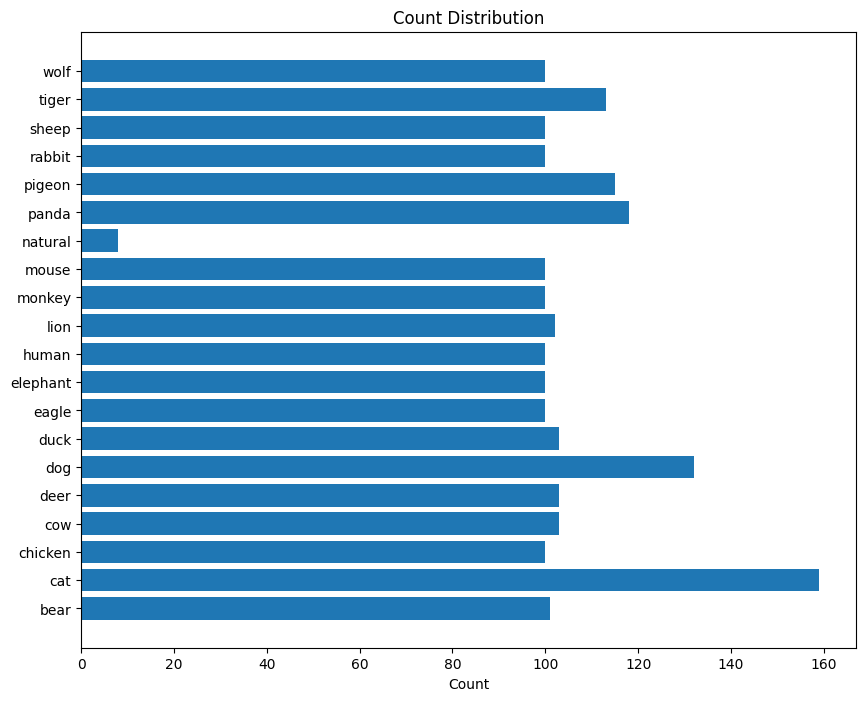

In [28]:
y = list(count_vals.keys())
vals = count_vals.values()
plt.figure(figsize=(10,8))
plt.xlabel('Count')
plt.title('Count Distribution')
plt.barh(y,vals)

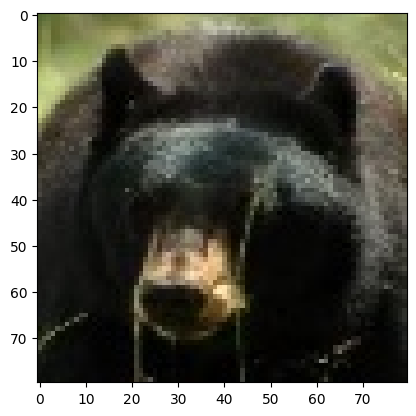

In [29]:
plt.imshow(data['data'][10])
plt.show()

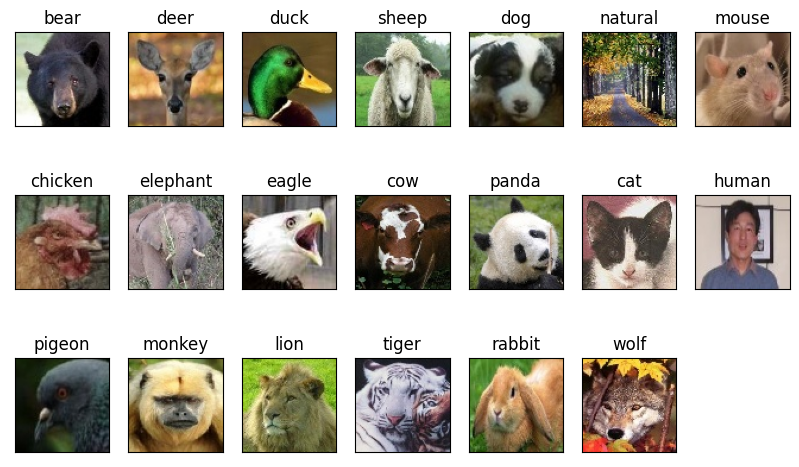

In [30]:
plt.figure(figsize=(10,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    plt.title(c)

plt.show()

In [1]:
#end